# Import Libraries and Data

# Data cleaning

# Exploring Relationship
  - Correlations
  - Scatterplots
  - Pair Plots
  - Categorical Plots

In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


In [4]:
df = pd.read_csv(r"C:\Users\Home\Desktop\Career Foundry- Data Analyst.2\Task Submissions\Task excercise 6-Final\Bank Customer Churn Prediction_updated.csv")

In [5]:
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
df = df.drop('customer_id', axis=1)

In [7]:
df.head(10)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [8]:
df.describe

<bound method NDFrame.describe of       credit_score  country  gender  age  tenure    balance  products_number  \
0              619   France  Female   42       2       0.00                1   
1              608    Spain  Female   41       1   83807.86                1   
2              502   France  Female   42       8  159660.80                3   
3              699   France  Female   39       1       0.00                2   
4              850    Spain  Female   43       2  125510.82                1   
...            ...      ...     ...  ...     ...        ...              ...   
9995           771   France    Male   39       5       0.00                2   
9996           516   France    Male   35      10   57369.61                1   
9997           709   France  Female   36       7       0.00                1   
9998           772  Germany    Male   42       3   75075.31                2   
9999           792   France  Female   28       4  130142.79                1   

     

In [9]:
df.info

<bound method DataFrame.info of       credit_score  country  gender  age  tenure    balance  products_number  \
0              619   France  Female   42       2       0.00                1   
1              608    Spain  Female   41       1   83807.86                1   
2              502   France  Female   42       8  159660.80                3   
3              699   France  Female   39       1       0.00                2   
4              850    Spain  Female   43       2  125510.82                1   
...            ...      ...     ...  ...     ...        ...              ...   
9995           771   France    Male   39       5       0.00                2   
9996           516   France    Male   35      10   57369.61                1   
9997           709   France  Female   36       7       0.00                1   
9998           772  Germany    Male   42       3   75075.31                2   
9999           792   France  Female   28       4  130142.79                1   

      c

In [10]:
df.shape

(10000, 11)

# Data Cleaning

In [11]:
# Checking missing values
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

No missing values found 

In [12]:
df.duplicated().sum()

0

There is no duplicates

In [15]:
#Converting Categorical Columns to Numerical
df['country'] = df['country'].astype('category').cat.codes
df['gender'] = df['gender'].astype('category').cat.codes
df['credit_card'] = df['credit_card'].astype('category').cat.codes
df['active_member'] = df['active_member'].astype('category').cat.codes


# Creating Correlation Matrix

In [16]:
#Compute Correlation Matrix
correlation_matrix = df.corr()


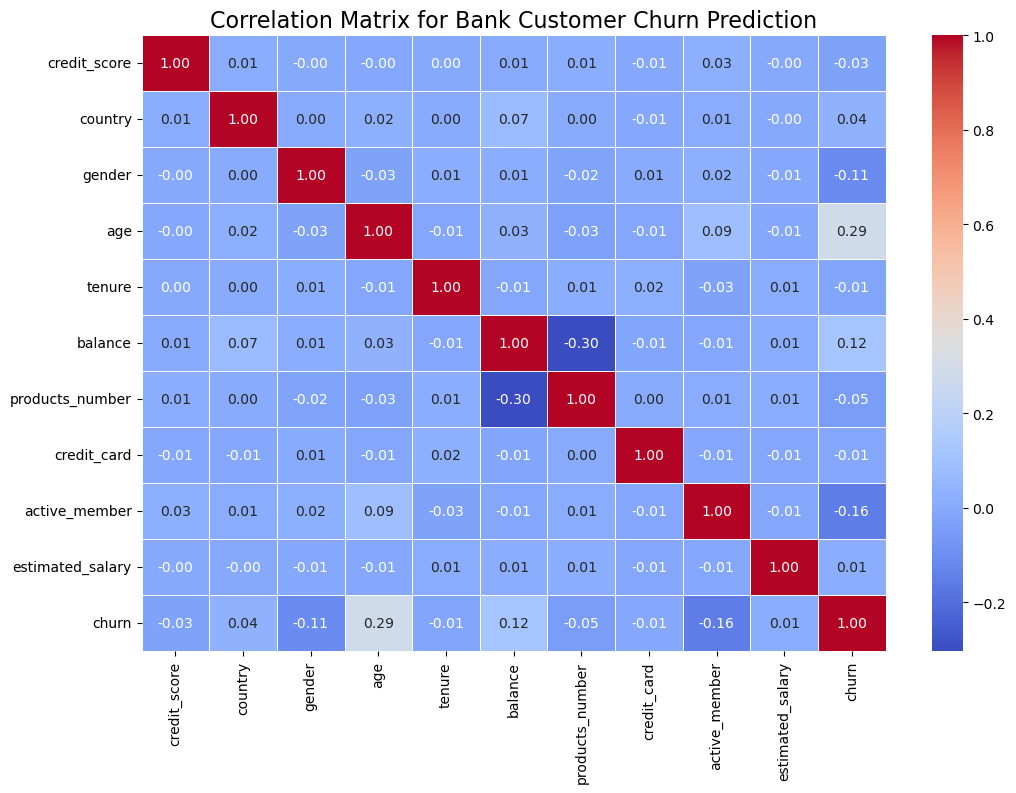

In [17]:
#Visualize Correlation Matrix:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, annot_kws={"size": 10})
plt.title('Correlation Matrix for Bank Customer Churn Prediction', fontsize=16)
plt.show()


Age and churn have a correlation of 0.29 and balance and products_number have a correlation of 0.30. From these values, the pair of variables balance and products_number have the highest positive correlation at 0.30.

# Creating scatterplots for the variables

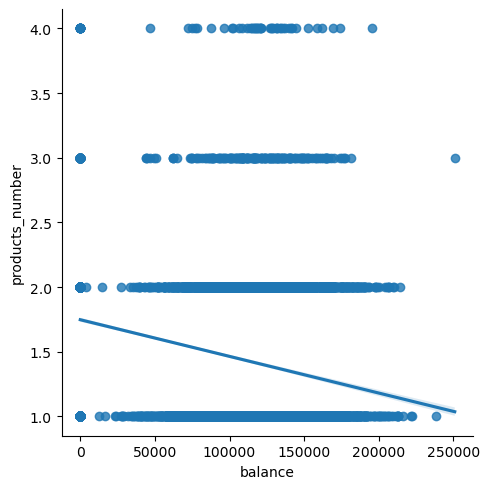

In [18]:
sns.lmplot(x = 'balance', y = 'products_number', data = df)

This scatterplot suggests that there is no strong relationship between balance and products_number, as evidenced by the scattered data points and the weakly sloping trend line. Most customers hold a small number of products, and this pattern does not vary significantly with their account balance.

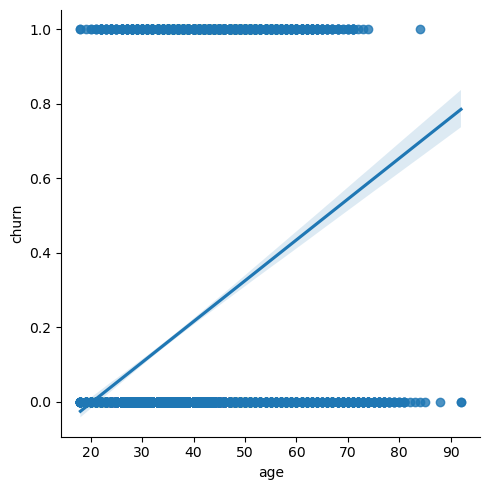

In [19]:
sns.lmplot(x = 'age', y = 'churn', data = df)


This scatterplot with the regression line effectively illustrates the positive relationship between customer age and the likelihood of churn. Older customers are more prone to churn, which aligns with the correlation observed in the correlation matrix.

# Creating Pair Plot of the entire dataset.

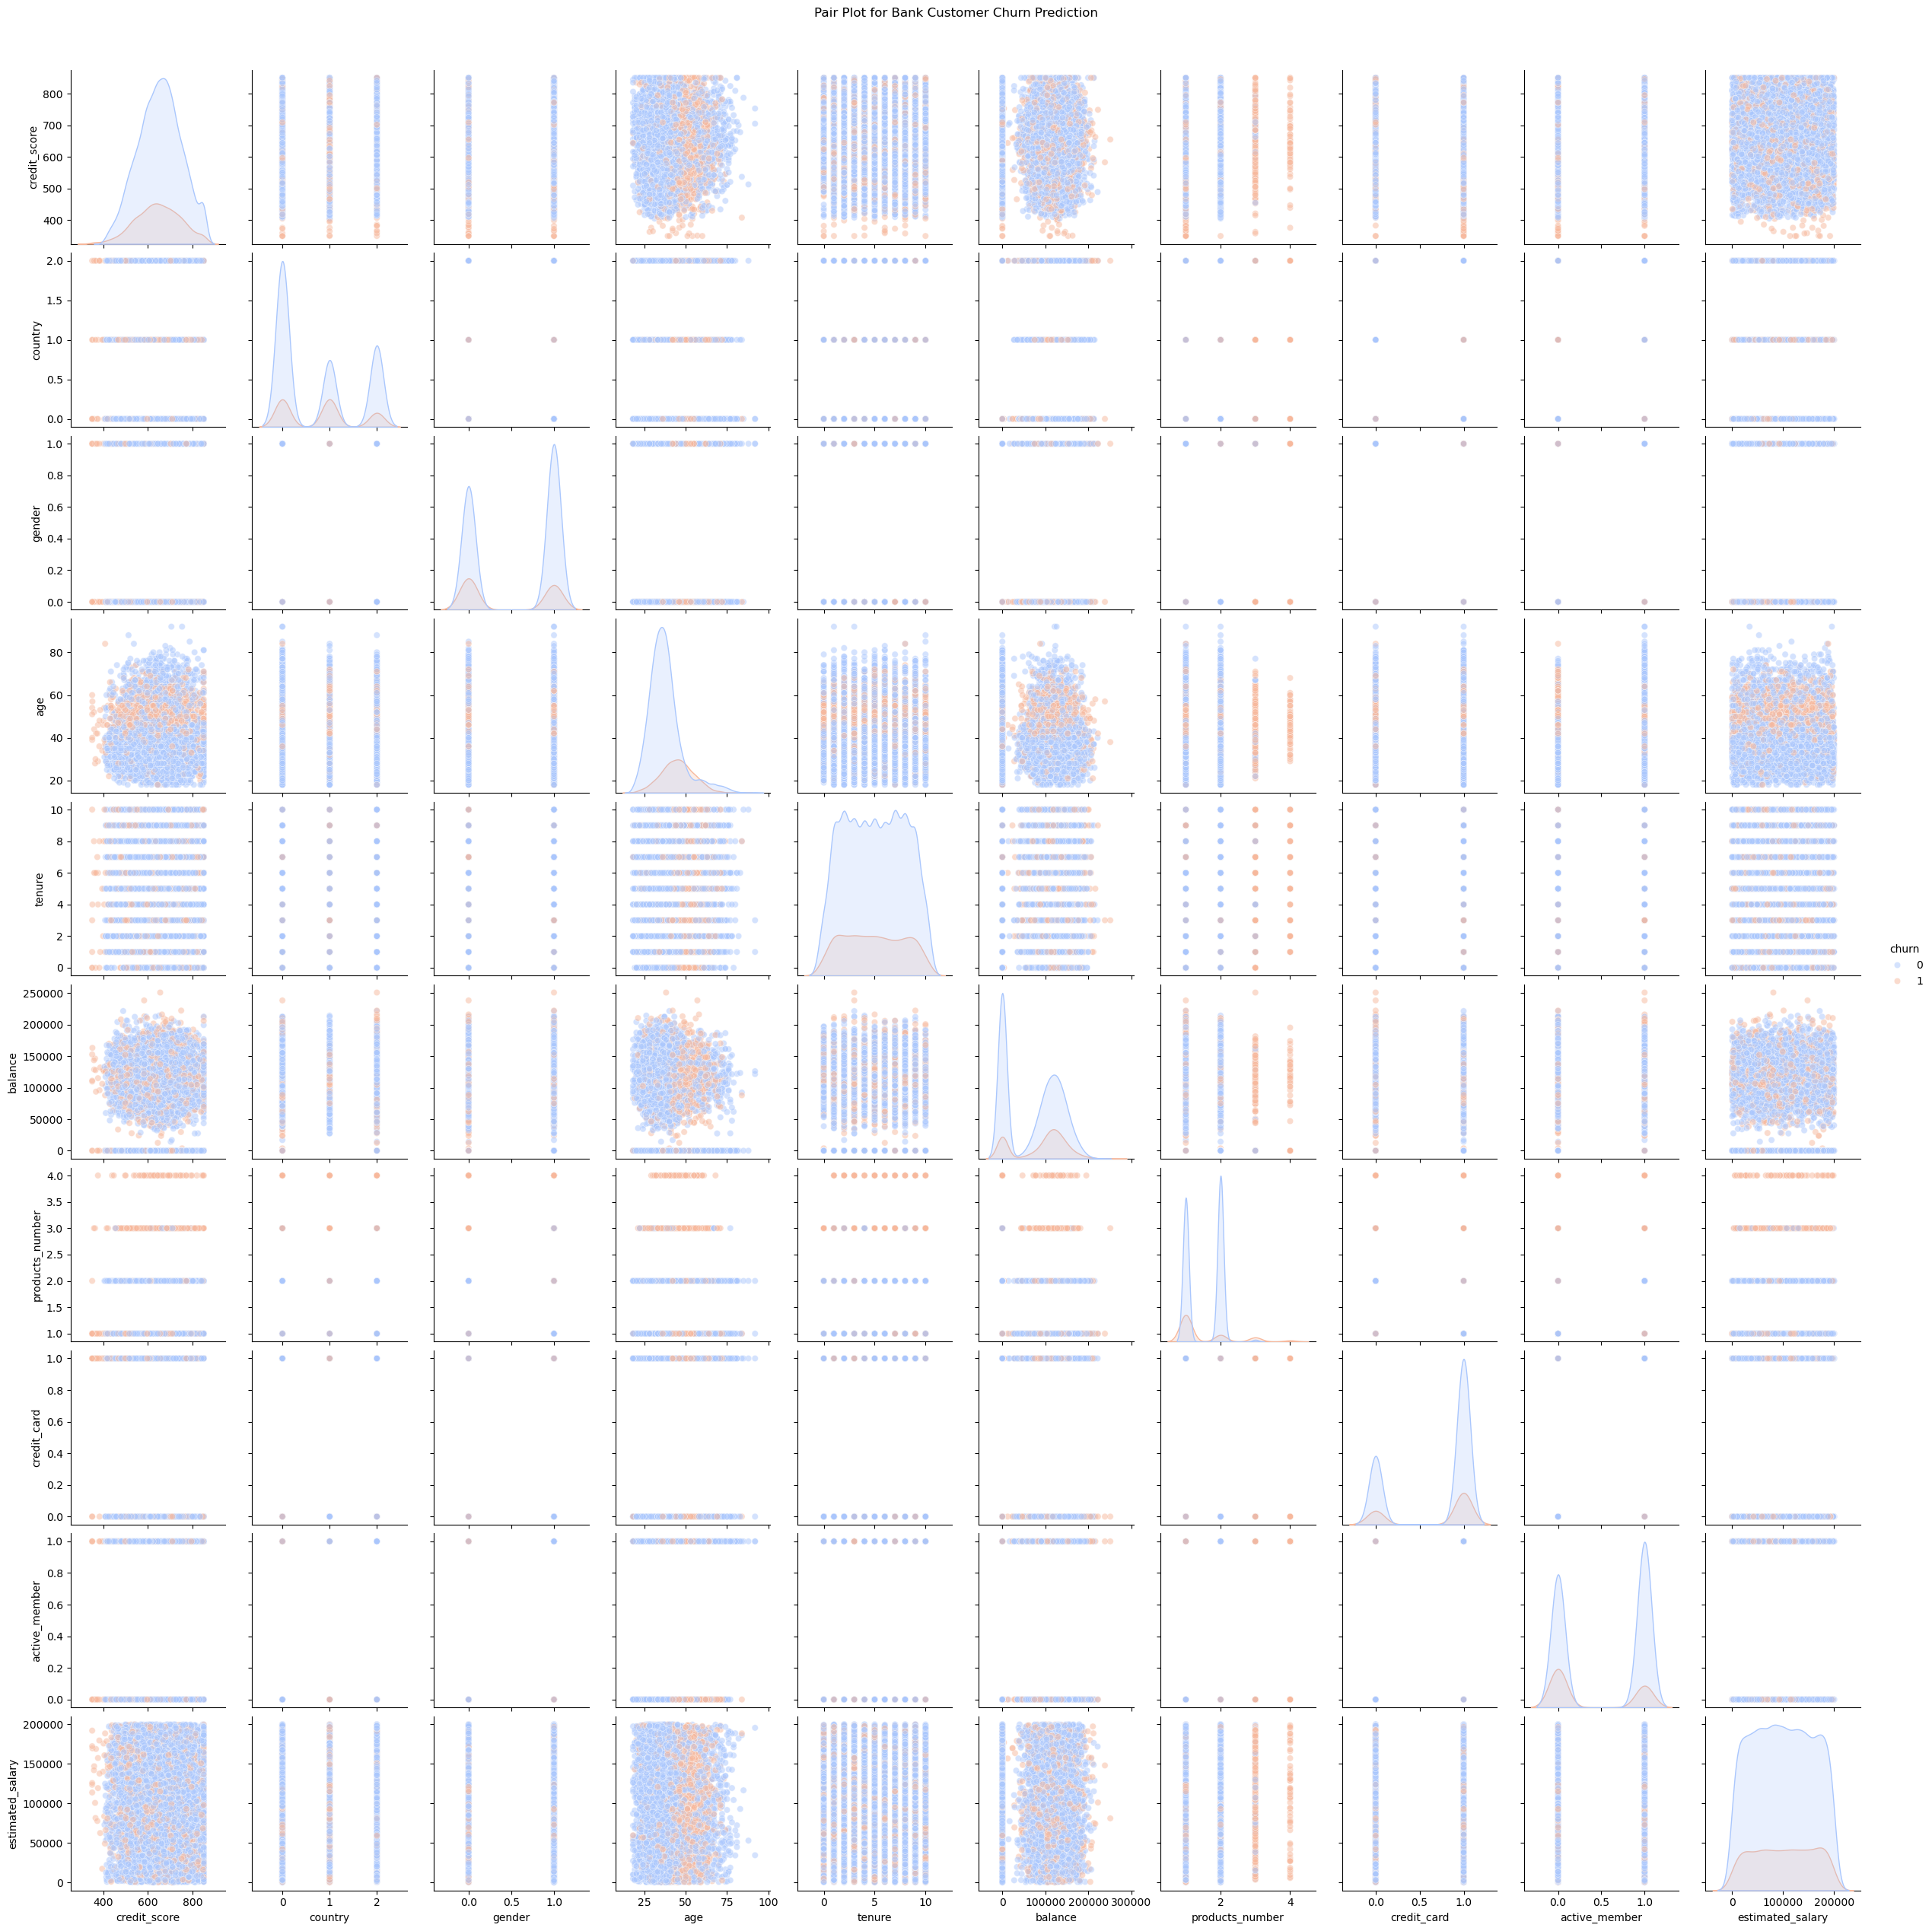

In [20]:
sns.pairplot(df, hue='churn', plot_kws={'alpha':0.5}, palette='coolwarm')
plt.suptitle('Pair Plot for Bank Customer Churn Prediction', y=1.02)
plt.show()


The pair plot provides a comprehensive visualization of how each variable interacts with every other variable and how they relate to churn.
- Age and Churn: Older customers tend to churn more, as indicated by both the scatterplots and the trend lines.
- Distribution Insights: Variables like balance are skewed, while age is more uniformly distributed.
- Visual Trends: While some variables like age show clear visual trends with churn, others like credit_score and estimated_salary do not.


# Creating Catagorical Plot Graph

<Axes: xlabel='age', ylabel='Count'>

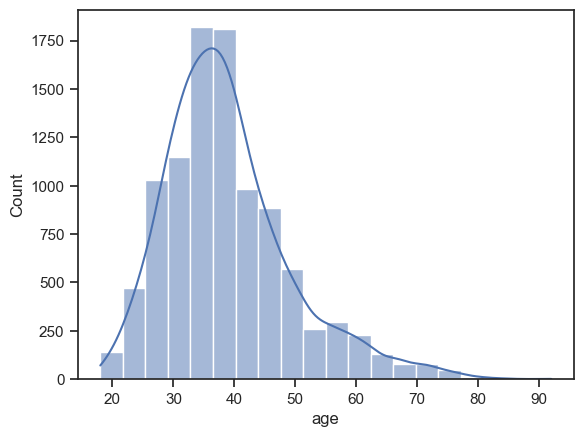

In [37]:
sns.histplot(df['age'], bins = 20, kde = True)


<Figure size 1000x600 with 0 Axes>

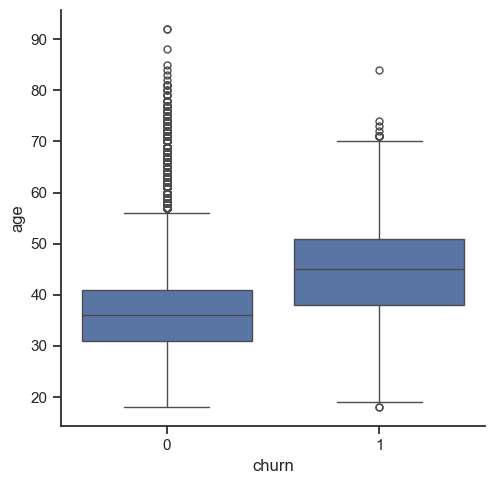

In [39]:
plt.figure(figsize=(10, 6))
sns.set(style="ticks")
g = sns.catplot(x="churn", y="age", kind="box", data=df)

In [29]:
#creat catogory of age
df.loc[df['age'] < 25, 'age_category'] = 'very young'


In [30]:
df.loc[(df['age'] >= 25) & (df['age'] < 40), 'age_category'] = 'young'


In [31]:
df.loc[(df['age'] >= 40) & (df['age'] < 60), 'age_category'] = 'middle-aged'

In [32]:
df.loc[(df['age'] >= 60) & (df['age'] < 80), 'age_category'] = 'old'

In [33]:
df.loc[df['age'] >= 80, 'age_category'] = 'very old'

In [34]:
df['age_category'].value_counts(dropna = False)

age_category
young          5530
middle-aged    3487
old             511
very young      457
very old         15
Name: count, dtype: int64

Text(0.5, 1.0, 'Box Plot of Age by Churn Status')

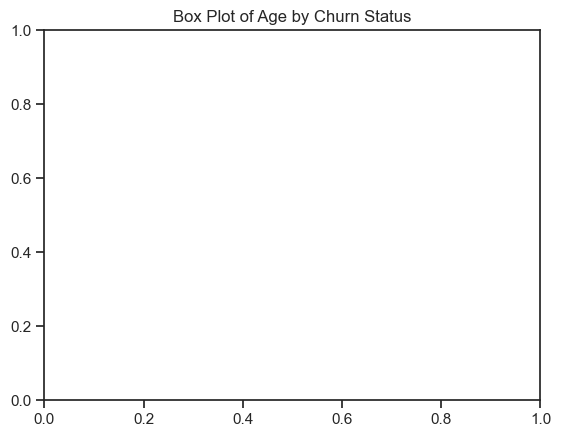

In [43]:
# Set plot title and labels
g.set_axis_labels("churn", "Age")
plt.title('Box Plot of Age by Churn Status')

# Further Graphs for Data Exploration 

In [54]:
# converting encoded values of 0, 1, 2 and with the original country names Germany, France and Spain .
country_mapping = {0: 'Germany', 1: 'France', 2: 'Spain'}

# Apply this mapping to the 'country' column
df['country'] = df['country'].map(country_mapping)


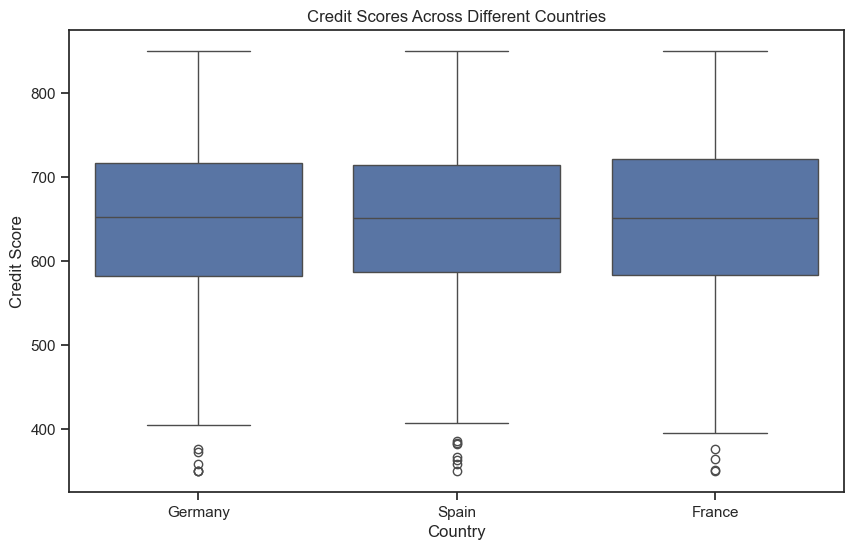

In [53]:

#Relationship Between Credit Scores and Countries

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='country', y='credit_score')
plt.title('Credit Scores Across Different Countries')
plt.xlabel('Country')
plt.ylabel('Credit Score')
plt.show()


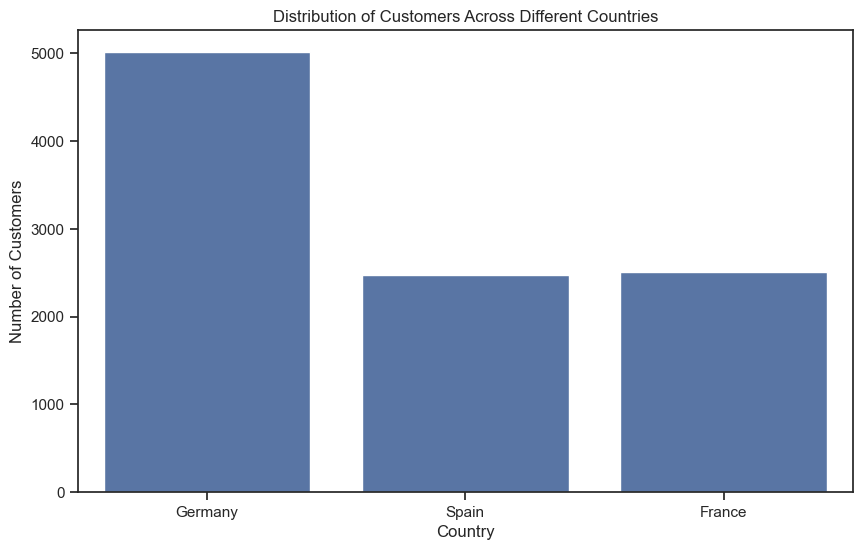

In [51]:
#Distribution of Customers Across Different Countries
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='country')
plt.title('Distribution of Customers Across Different Countries')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.show()

In [58]:
# calculating Key Summary Statistics for Credit Scores
summary_stats = df['credit_score'].describe()
print(summary_stats)


count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: credit_score, dtype: float64


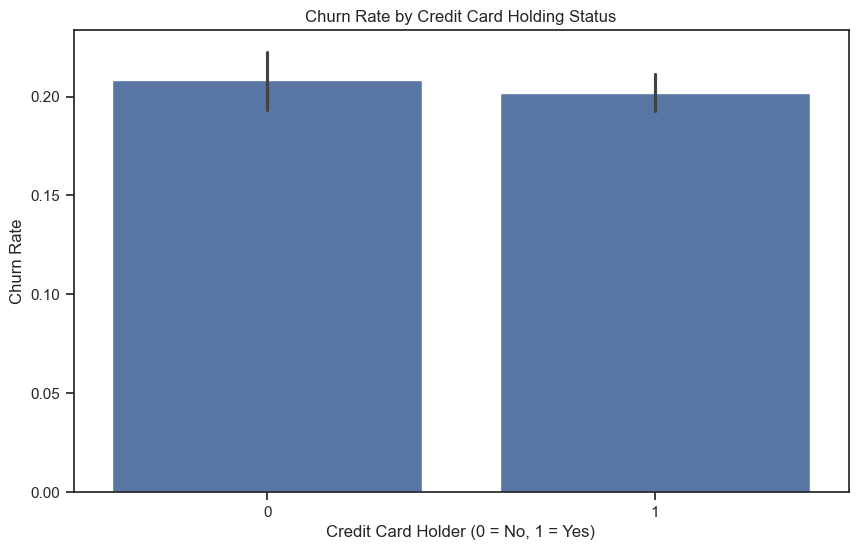

In [48]:
# Churn Rate Difference Between Customers Who Hold Credit Cards and Those Who Do Not
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='credit_card', y='churn')
plt.title('Churn Rate by Credit Card Holding Status')
plt.xlabel('Credit Card Holder (0 = No, 1 = Yes)')
plt.ylabel('Churn Rate')
plt.show()


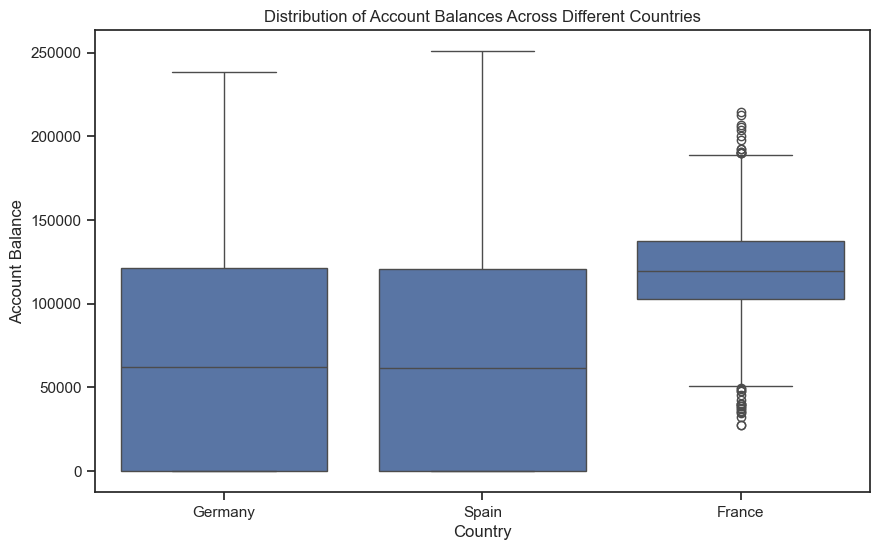

In [52]:
#Distribution of Account Balances Across Different Countries

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='country', y='balance')
plt.title('Distribution of Account Balances Across Different Countries')
plt.xlabel('Country')
plt.ylabel('Account Balance')
plt.show()


# Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

**What is the distribution of customers across different countries in the dataset?**

- The customer base is unevenly distributed across the three countries. Germany has the largest number of customers, while Spain and France have similar, smaller customer counts. This distribution indicates that the company might have a stronger presence or better market penetration in Germany compared to Spain and France.

**Is there any discernible pattern or relationship between credit scores and countries in the dataset?**

- The median credit scores are very similar across all three countries, hovering slightly above 600. The IQRs for all three countries are also similar, indicating that the middle 50% of credit scores for customers in Germany, Spain, and France are distributed similarly. All three countries have outliers with credit scores below 400. There is no significant difference in the distribution of credit scores among the customers from Germany, Spain, and France, indicating a similar credit scoring pattern across these countries.

**How does the churn rate differ between customers who hold credit cards and those who do not?**

- The churn rates for both credit card holders and non-credit card holders are very similar, hovering around 20%. There is no significant difference in the churn rate between customers who have a credit card and those who do not, as indicated by the almost identical heights of the bars.



**What are the key summary statistics (mean, median, standard deviation, etc.) for credit scores in the dataset?**

In [47]:
summary_stats = df['credit_score'].describe()
print(summary_stats)


count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: credit_score, dtype: float64


# Define any hypotheses that you can at this point.

- The majority of the bank's customers are from Germany, suggesting that Germany might be the bank's primary market. Consequently, marketing and customer retention strategies might need to be tailored specifically for the German market to maximize their effectiveness.

- There is no significant difference in the median credit scores across Germany, Spain, and France. The credit score distributions are quite similar, indicating that the bank's credit policies and customer profiles are consistent across these countries.